In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import torch
from torch.nn import Linear, MSELoss
from torch.optim import SGD

from helper_functions import fit, evaluate_model, scale_data, draw_epochs_losses

In [ ]:
print(os.listdir("../Data/Input"))

['Life Expectancy Data.csv', 'test.csv', 'train.csv']


# **1 &nbsp;&nbsp;&nbsp; Load Data**

In [ ]:
train_df = pd.read_csv("../Data/Input/Train/train.csv")
test_df = pd.read_csv("../Data/Input/Test/test.csv")

# **2 &nbsp;&nbsp;&nbsp; Standardize Data**

In [7]:
# Get the features and target
derived_features_train = pd.concat([
    train_df["percentage expenditure"] / train_df["GDP"], 
    train_df["Income composition of resources"]
], axis=1, ignore_index=True)
derived_features_test = pd.concat([
    test_df["percentage expenditure"] / test_df["GDP"], 
    test_df["Income composition of resources"]
], axis=1, ignore_index=True)

derived_target_train = train_df["Life expectancy "]
derived_target_test = test_df["Life expectancy "]

In [8]:
# Convert to tensor
X_derived_train = torch.tensor(derived_features_train.values, dtype=torch.float32)
y_derived_train = torch.tensor(derived_target_train.values, dtype=torch.float32).view(-1, 1)

X_derived_test = torch.tensor(derived_features_test.values, dtype=torch.float32)
y_derived_test = torch.tensor(derived_target_test.values, dtype=torch.float32).view(-1, 1)

In [9]:
# Scale data
X_derived_train = scale_data(X_derived_train)
y_derived_train = scale_data(y_derived_train)

X_derived_test = scale_data(X_derived_test)
y_derived_test = scale_data(y_derived_test)

# **3 &nbsp;&nbsp;&nbsp; Declare Model**

In [10]:
derived_model = Linear(in_features=X_derived_train.shape[1], out_features=1)
for param in derived_model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.0127, -0.3624]], requires_grad=True)
Parameter containing:
tensor([-0.3578], requires_grad=True)


# **4 &nbsp;&nbsp;&nbsp; Train Model**

In [11]:
derived_model, derived_epochs_losses = fit(
    derived_model,
    criterion=MSELoss(),
    optimizer=SGD(derived_model.parameters(), lr=0.01),
    train_data=X_derived_train,
    train_target=y_derived_train,
    epochs=2000,
    n_iter_not_change=500,
    lr_decay=0.1
)

Epoch [1/2000], Loss: 1.8538, LR: 0.01000
Epoch [100/2000], Loss: 0.3436, LR: 0.01000
Epoch [200/2000], Loss: 0.3159, LR: 0.01000
Epoch [300/2000], Loss: 0.3154, LR: 0.01000
Epoch [400/2000], Loss: 0.3154, LR: 0.01000
Epoch [500/2000], Loss: 0.3154, LR: 0.01000
Epoch [600/2000], Loss: 0.3154, LR: 0.00100
Epoch [700/2000], Loss: 0.3154, LR: 0.00100
Epoch [800/2000], Loss: 0.3154, LR: 0.00100
Epoch [900/2000], Loss: 0.3154, LR: 0.00100
Epoch [1000/2000], Loss: 0.3154, LR: 0.00100
Epoch [1100/2000], Loss: 0.3154, LR: 0.00010
Epoch [1200/2000], Loss: 0.3154, LR: 0.00010
Epoch [1300/2000], Loss: 0.3154, LR: 0.00010
Epoch [1400/2000], Loss: 0.3154, LR: 0.00010
Epoch [1500/2000], Loss: 0.3154, LR: 0.00010
Epoch [1600/2000], Loss: 0.3154, LR: 0.00001
Epoch [1700/2000], Loss: 0.3154, LR: 0.00001
Epoch [1800/2000], Loss: 0.3154, LR: 0.00001
Epoch [1900/2000], Loss: 0.3154, LR: 0.00001
Epoch [2000/2000], Loss: 0.3154, LR: 0.00001


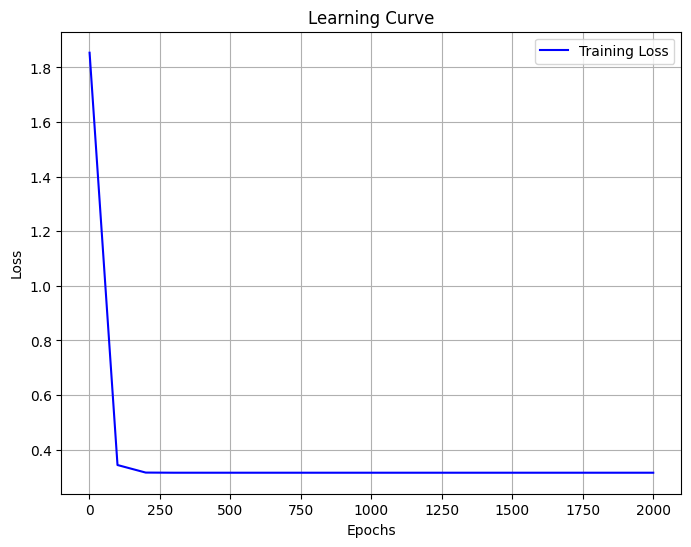

In [12]:
draw_epochs_losses(derived_epochs_losses)

# **5 &nbsp;&nbsp;&nbsp; Evaluate Model**

In [13]:
derived_loss = evaluate_model(
    derived_model,
    criterion=MSELoss(),
    test_data=X_derived_test,
    test_target=y_derived_test
)
 
print("Model loss:", derived_loss.item())

Model loss: 0.29967400431632996


In [14]:
print("Model weights:", derived_model.weight)
print("Model bias:", derived_model.bias)

Model weights: Parameter containing:
tensor([[0.0527, 0.8222]], requires_grad=True)
Model bias: Parameter containing:
tensor([-5.5525e-06], requires_grad=True)


# **6 &nbsp;&nbsp;&nbsp; Write to File**

In [ ]:
torch.save(derived_model.state_dict(), "../Data/Output/DerivedFeatureModel/derived_feature_model.pth")